### Title: Sales analysis Real world Project with python




* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)


* #### Github Link: [Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZDExZjU5ZDYtYzAwYS00NDIxLWI4YWMtNmY0ZjM3NTE0NWNjIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction

* The following dataset contains information about the revenue, profits, unit cost, products, dates, totals sales that the company had in 4 years that is from 2011 to 2016

* The data is a csv file and analysis is done using pandas 
* The data will be saved and exported to power bi for good visualisations
* matplotlib will be used for some data visualisations to get the inisghts of the data



#### Questions to answer

These Questions will be answered under phase3: of the data analysis 


* Which Product category had highest sales
* Which Product is favoured by females
* which of the 10 that product has the highest revenue
* Which month produced highest profits
* How many product are in the company
* Which day of the week had the highest order quantity
* Which sub category was most ordered in 2014
* what is the product favoured by people under the age of 40
* which Year produced highest revenue
* which country had the highest sales
* which country had the highest revenue and profits in 2015
* what was the highest ordered product and the one that produced highest profit in Canada in 2015
* Which Australia states bought highest number of bike rakes
* which products were favoured by the different age groups
* which customer age had highest order quantity
* what was the prodct that made more profit 
* find the relationships between the variables and plot the visuals

The questions were brought up by the arthor as a way of story telling

# Phase 1: Prepare

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.


In [1]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns

import matplotlib
%matplotlib inline 

import data downloaded already and in the local machine

In [2]:
na_vals = ['nan', 'NaN', ' ', ' missing', 'Missing', 'naN', None]     # a list containing all the values to be deemed as null values
df = pd.read_csv(r"C:\Users\Tamie\Downloads\datasets\sales.csv", na_values = na_vals)   # a list of null values that is set equal to the na_values




#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#on this following method inputting r doesnt matter
#import the in the jupyter notebook folder you wroking on and copy the name of the dataset hence insert it in the parentheses


In [3]:
#take a look at the first 2 rows of the dataset

df.head(2)            # 2 in the parethesis shows only the first 2 rows, however by default that is if there
                      # is no any number it shows the first 5 rows

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0


In [4]:
#take a look at the last 2 rows of the dataset

df.tail(2) 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
105151,2015-09-23,23,September,2015,46,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Patch Kit/8 Patches,17.0,1.0,2.0,16.0,17.0,33.0
105152,2013-10-09,9,October,2013,46,Adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check the shape of the date
df.shape

(105153, 18)

the dataset has 105153 rows and 18 columns

In [6]:
#check all the column names of the dataset

df.columns.to_frame()

,0
Date,Date
Day,Day
Month,Month
Year,Year
Customer_Age,Customer_Age
Age_Group,Age_Group
Customer_Gender,Customer_Gender
Country,Country
State,State
Product_Category,Product_Category


# Phase 2: Data Processing

This phase includes all the cleaning, transforming and processing of data

### Step 1: Check for all the the missing or na values in the dataset

In [7]:

df.isnull().sum()        # checks all the rows to see if there are any missing values or na values and sum them all

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     1
Country             1
State               1
Product_Category    1
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

This shows that starting from customer gender to revenue there is a missing value presented, Before dropping the rows or columns care should be taken as to weather if the rows can be filled or not, through asking or through using the mean values, or through using the most values. The decision made is based upon those factors, from the looks of it some of the rows cannot be filled, hence dropping them is the way.

In this case dropping the values wont hurt the dataset at all cost and its the fastest and efficient process to do

In [8]:
# before dropping check the rows having the null_values chances are that they are in the same row

df.replace({np.nan: 'na_va'}, inplace = True)      # replaces all the np.nan values with 'na_va', inplace = True shows that changes done will affect the whole dataset

filt = (df['State'] == 'na_va')                    # filters the rows having the values with 'na_va', that has replaced the np.nan
df[filt]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
105152,2013-10-09,9,October,2013,46,Adults,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va


as predicted its only on row having all the missing information, this makes it easy to drop

In [9]:
#drop all the null values
df.replace({'na_va': np.nan}, inplace = True)     #reverse the process done above of replacing the np.nan values with na_va
df.dropna(inplace = True)

check the shape of the dataset again

In [10]:
df.shape

(105152, 18)

now there are 105152 rows instead of 105153 obtained before the dataset was cleaned

### Step 2: Check for the datatypes in the dataset to see if there is need to change the datatypes of some columns

In [11]:
df.head(1)        # take a look at the dataset


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0


In [12]:
df.dtypes

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity      float64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

Date has to be converted from the object datatype to the timestamp 

In [13]:
df['Date'] = pd.to_datetime(df['Date'])        #converting the object datatype from object in date column to the timestamp 

In [14]:
#check the datatype
df['Date'].dtype

dtype('<M8[ns]')



checking from the previous dataset its datatype has changed

#### Step 2.1: Create a columns containing day names in the dataset

In [15]:
df['Day_Of_Week'] = df['Date'].dt.day_name()

In [16]:
df.head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday



the day of the week column has been added at the end of the dataset

### Step 3: Make the data understandable by users for column name Customer_Gender, M should be replaced by male and so forth

In [17]:
df['Customer_Gender'].value_counts()       #checking all the unique values in the dataset

M    54146
F    51006
Name: Customer_Gender, dtype: int64

There are only 2 values that is the M and F that is male and female

In [18]:
df['Customer_Gender'].replace({'M': 'Male', 'F':'Female'}, inplace = True)

In [19]:
# take a look at first 3 rows of the dataset
df.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday
1,2015-11-26,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Thursday
2,2014-03-23,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,Sunday


values under customer Gender has changed

### Step 4: Check and clean the duplicates

In [20]:
df.duplicated().sum()                     #showing the duplicated values
#df[filt]

922

922 rows are duplicated

In [21]:
#this can also be seen by the following method as well
filt = (df.duplicated())
df[filt]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
1021,2013-12-19,19,December,2013,22,Youth (<25),Male,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9.0,59.0,159.0,714.0,531.0,1245.0,Thursday
1091,2015-09-30,30,September,2015,42,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5.0,4.0,10.0,20.0,20.0,40.0,Wednesday
1093,2013-10-24,24,October,2013,42,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2.0,4.0,10.0,8.0,8.0,16.0,Thursday
1095,2015-10-24,24,October,2015,42,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1.0,4.0,10.0,4.0,4.0,8.0,Saturday
1193,2016-01-15,15,January,2016,42,Adults (35-64),Male,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14.0,2.0,5.0,29.0,28.0,57.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104919,2015-10-31,31,October,2015,43,Adults (35-64),Male,Australia,Victoria,Accessories,Tires and Tubes,HL Mountain Tire,15.0,13.0,35.0,220.0,195.0,415.0,Saturday
104970,2013-12-25,25,December,2013,22,Youth (<25),Female,United States,California,Accessories,Tires and Tubes,LL Road Tire,7.0,8.0,21.0,88.0,56.0,144.0,Wednesday
105003,2016-05-10,10,May,2016,22,Youth (<25),Female,United States,California,Accessories,Tires and Tubes,LL Road Tire,1.0,8.0,21.0,13.0,8.0,21.0,Tuesday
105049,2016-02-19,19,February,2016,21,Youth (<25),Male,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,2.0,1.0,2.0,1.0,2.0,3.0,Friday


#### drop duplicated values

In [22]:
#check the data shape before dropping the rows
df.shape

(105152, 19)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(104230, 19)

number of rows have been reduced from the starting rows without dropping the duplicates

In [25]:
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday
1,2015-11-26,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Thursday


# Phase 3: Exploratory Data Analysis (EDA)

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

#### Question 1: Which Product category had highest sales


In [26]:
df['Product_Category'].value_counts()

Accessories    66148
Bikes          22116
Clothing       15966
Name: Product_Category, dtype: int64

Accessories had the highest sales and the last one being clothing

#### Question 2: Which Product is favoured by females


In [27]:
df.head(1)     # take a loot at the dataset

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday


In [28]:
filt = (df['Customer_Gender'] == 'Female')
df[filt].Product.value_counts().sort_values(ascending=False).head(5)      #5 most products favoured by womens

Water Bottle - 30 oz.     5324
Patch Kit/8 Patches       4463
Mountain Tire Tube        3595
AWC Logo Cap              2162
Sport-100 Helmet, Blue    1945
Name: Product, dtype: int64

Water Bottle - 30 oz.  was the product that had more sales from women

#### Question 3: which of the 10 that product has the highest revenue

In [29]:

df.groupby('Product').Revenue.sum().sort_values(ascending= False).head(10)     #top 10 products that produced more revenue

Product
Road-150 Red, 62           3810023.0
Mountain-200 Black, 38     3345501.0
Road-150 Red, 52           3152610.0
Road-150 Red, 56           3142811.0
Mountain-200 Silver, 42    3070174.0
Mountain-200 Silver, 38    3011267.0
Road-150 Red, 48           2955506.0
Mountain-200 Black, 46     2756837.0
Mountain-200 Black, 42     2630865.0
Mountain-200 Silver, 46    2364776.0
Name: Revenue, dtype: float64

the first product Road-150 Red, 48 had the revenue of 3829416.0

#### Question 4: Which month produced highest profits


In [30]:
df.groupby('Month').Profit.sum().sort_values(ascending = False)

Month
June         3054528.0
December     3030490.0
May          2982020.0
April        2594493.0
March        2496647.0
January      2359687.0
February     2303078.0
November     2115108.0
September    2068920.0
October      2049163.0
August       2044661.0
July         1951243.0
Name: Profit, dtype: float64

June had the highest of profits the last being in July

#### Question 5: How many product are in the company

In [31]:
df['Product'].nunique()

105

The company has a total of 105 products

#### Question 6: Which day of the week had the highest order quantity
          
    


In [32]:
df.groupby('Day_Of_Week').Order_Quantity.sum().sort_values(ascending=False)

Day_Of_Week
Saturday     183771.0
Thursday     183219.0
Tuesday      181783.0
Sunday       180013.0
Friday       179663.0
Wednesday    179450.0
Monday       179168.0
Name: Order_Quantity, dtype: float64

Saturday had was the busy day as monday was the low

#### 6b): Which sub category was most ordered in 2014

In [33]:
filt = df['Year'] == 2014
df[filt].groupby('Sub_Category').Order_Quantity.sum().sort_values(ascending=False)

Sub_Category
Tires and Tubes      131619.0
Bottles and Cages     70932.0
Helmets               51558.0
Jerseys               24160.0
Caps                  19800.0
Fenders               17348.0
Gloves                11499.0
Cleaners               8041.0
Shorts                 6784.0
Hydration Packs        5314.0
Socks                  5132.0
Road Bikes             1829.0
Mountain Bikes         1706.0
Bike Racks             1388.0
Bike Stands             582.0
Name: Order_Quantity, dtype: float64

Tires and Tubes were the most ordered

#### Question 7: what is the product favoured by people under the age of 40

In [34]:

filt = df['Customer_Age'] < 40
df[filt].Product.value_counts().sort_values(ascending=False).head()    #showing the first 5 products liked by people under the age of 40

Water Bottle - 30 oz.    7076
Patch Kit/8 Patches      6103
Mountain Tire Tube       4504
AWC Logo Cap             2908
Sport-100 Helmet, Red    2842
Name: Product, dtype: int64

water bottle was the highest product ordered by the people under the age of 40

#### Question 8: which Year produced highest revenue



In [35]:
df.groupby('Year').Revenue.sum().sort_values(ascending = False)

Year
2015    17692208.0
2016    14866068.0
2013    13508329.0
2014    12108291.0
2012     9133795.0
2011     8951966.0
Name: Revenue, dtype: float64

2015 had the highest revenues

#### Question 9: which country had the highest sales

In [36]:
df.groupby('Year').Revenue.sum().sort_values(ascending = False)

United States     35968
Australia         22251
Canada            13623
United Kingdom    12366
France            10062
Germany            9960
Name: Country, dtype: int64

United states had highest number of sales, as germany had the least

#### Question 10: which country had the highest revenue and profits in 2015

In [37]:

filt = df['Year'] == 2015
df[filt].groupby('Country')['Revenue', 'Profit'].sum().sort_values(by = 'Revenue', ascending = False)    # sorting by the revenue column

C:\Users\Tamie\AppData\Local\Temp\ipykernel_15424\2857761055.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[filt].groupby('Country')['Revenue', 'Profit'].sum().sort_values(by = 'Revenue', ascending = False)    # sorting by the revenue column


,Revenue,Profit
Country,,
United States,5502088.0,2226079.0
Australia,5125553.0,1638175.0
United Kingdom,2161706.0,897393.0
Germany,1677864.0,630211.0
France,1639398.0,574580.0
Canada,1585599.0,765699.0


United states produced greater profits and revenue  in 2015

#### Question 11: what was the highest ordered product and the one that produced highest profit in Canada in 2015

In [38]:

filt = (df['Country'] == 'Canada') & (df['Year'] == 2015)
df[filt].groupby('Product')['Order_Quantity', 'Profit'].sum().sort_values(by = 'Order_Quantity', ascending = False). head(10)
#df[filt][['Product''Order_Quantity']].sum()

C:\Users\Tamie\AppData\Local\Temp\ipykernel_15424\3780740163.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[filt].groupby('Product')['Order_Quantity', 'Profit'].sum().sort_values(by = 'Order_Quantity', ascending = False). head(10)


,Order_Quantity,Profit
Product,,
Mountain Tire Tube,5929.0,17527.0
Patch Kit/8 Patches,5676.0,5609.0
Water Bottle - 30 oz.,5042.0,14903.0
Fender Set - Mountain,2924.0,40246.0
"Sport-100 Helmet, Blue",1892.0,40967.0
"Sport-100 Helmet, Red",1748.0,37866.0
Road Tire Tube,1449.0,4291.0
"Sport-100 Helmet, Black",1436.0,31091.0
AWC Logo Cap,1316.0,2517.0


Mountain-200 Black, 38 had the highest profit thought it was not highly ordered set sort values by profits
Mountain Tire Tube was the highest set sort values by Order_quantity

#### Question 12: Which Australia states bought highest number of bike rakes


In [39]:
filt = (df['Country'] == 'Australia') & (df['Sub_Category'] == 'Bike Racks')
df[filt].groupby('State').Order_Quantity.sum().sort_values(ascending=False)

State
New South Wales    210.0
Victoria           197.0
Queensland         146.0
South Australia     84.0
Name: Order_Quantity, dtype: float64

New South Wales had the highest order quantities 

#### Question 13: which products were favoured by the different age groups


In [40]:
#revist the dataset
df.head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday


In [41]:
df.groupby('Age_Group').Product.max().head(10)

Age_Group
Adults (35-64)          Women's Mountain Shorts, S
Seniors (64+)           Women's Mountain Shorts, S
Young Adults (25-34)    Women's Mountain Shorts, S
Youth (<25)             Women's Mountain Shorts, S
Name: Product, dtype: object

Women's Mountain Shorts, S by all the age groups

#### question 14: which customer age had highest order quantity


In [42]:
df.groupby('Customer_Age')['Order_Quantity'].sum().sort_values(ascending= False).head(10)

Customer_Age
31    49738.0
32    47949.0
34    47323.0
33    46511.0
29    44560.0
35    43482.0
30    42148.0
40    41719.0
37    41420.0
28    40266.0
Name: Order_Quantity, dtype: float64

31 years of age placed more orders

#### Question 15: what was the prodct that made more profit 

In [43]:

df.groupby('Product').Profit.sum().sort_values(ascending= False).head(10)

Product
Mountain-200 Black, 38     1302237.0
Road-150 Red, 62           1237388.0
Mountain-200 Silver, 42    1226878.0
Sport-100 Helmet, Red      1191175.0
Mountain-200 Silver, 38    1155311.0
Sport-100 Helmet, Black    1140795.0
Mountain-200 Black, 46     1075401.0
Sport-100 Helmet, Blue     1047701.0
Road-150 Red, 52           1044569.0
Mountain-200 Black, 42     1032061.0
Name: Profit, dtype: float64

Mountain-200 Black, 38 made the most profit

In [45]:
#df.to_csv(r"C:\Users\user\Downloads\power bi\cleaned_datasets\sales dataset.csv")   #export the dataset as csv for further visualsations in power BI

In [46]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Day_Of_Week
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Tuesday
1,2015-11-26,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,Thursday
2,2014-03-23,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,Sunday
3,2016-03-23,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,Wednesday
4,2014-05-15,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,Thursday


# 3.1 Establishing the relationships between variables

### step:1 Analyzing Individual Feature Patterns Using Visualization

In [47]:
#Checking the correlation of the variables
df.corr()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007975,-0.016119,-0.004669,0.005286,0.005294,0.006582,0.004509,0.005339
Year,-0.007975,1.000000,0.040120,0.136265,-0.240370,-0.234457,-0.204326,-0.246457,-0.237325
Customer_Age,-0.016119,0.040120,1.000000,0.029920,-0.026052,-0.024573,0.000659,-0.021131,-0.013975
Order_Quantity,-0.004669,0.136265,0.029920,1.000000,-0.501041,-0.501866,-0.237239,-0.336240,-0.309224
Unit_Cost,0.005286,-0.240370,-0.026052,-0.501041,1.000000,0.997836,0.753268,0.845850,0.832745
Unit_Price,0.005294,-0.234457,-0.024573,-0.501866,0.997836,1.000000,0.761684,0.841212,0.832578
Profit,0.006582,-0.204326,0.000659,-0.237239,0.753268,0.761684,1.000000,0.901808,0.956870
Cost,0.004509,-0.246457,-0.021131,-0.336240,0.845850,0.841212,0.901808,1.000000,0.988456
Revenue,0.005339,-0.237325,-0.013975,-0.309224,0.832745,0.832578,0.956870,0.988456,1.000000


* There is a great relationship between the  cost and revenue

* there is a strong correlation between Revenue and profit, strong corrrelation between Unit price and cost

* good correlation between Profit unit price


however more anaylsis needs to be establised to have more relationships between the variables

In [48]:
#take in 6 variables and check their correlation
df[['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].corr()

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Order_Quantity,1.000000,-0.501041,-0.501866,-0.237239,-0.336240,-0.309224
Unit_Cost,-0.501041,1.000000,0.997836,0.753268,0.845850,0.832745
Unit_Price,-0.501866,0.997836,1.000000,0.761684,0.841212,0.832578
Profit,-0.237239,0.753268,0.761684,1.000000,0.901808,0.956870
Cost,-0.336240,0.845850,0.841212,0.901808,1.000000,0.988456
Revenue,-0.309224,0.832745,0.832578,0.956870,0.988456,1.000000


Order quantity shows negative correlation with all the variables

### Plot the relationships

#### * Plotting the relationship between the cost and the revenue

C:\Users\Tamie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost', ylabel='Revenue'>

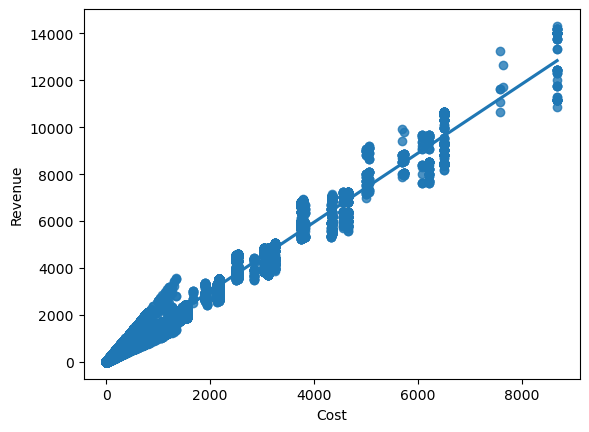

In [49]:
sns.regplot(df['Cost'], df['Revenue'], data=df)

* There is a excellent relationship between the  cost and revenue


#### * plotting the relationship between revenue and profit

<AxesSubplot:xlabel='Profit', ylabel='Revenue'>

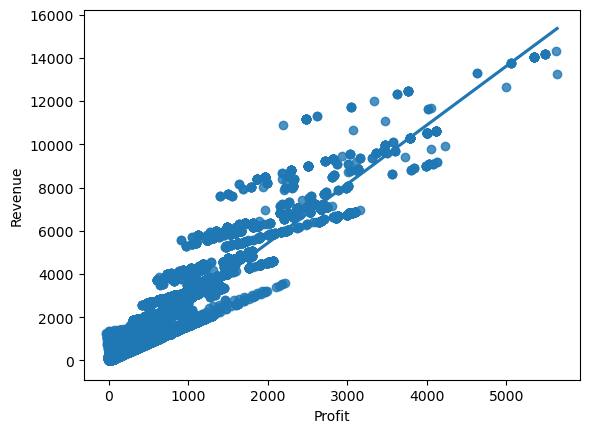

In [50]:
sns.regplot(df['Profit'], df['Revenue'], data=df)

* There is a good correlation between the profit and revenue but its not as good as seen by the first comparison

# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: Product Category Distribution

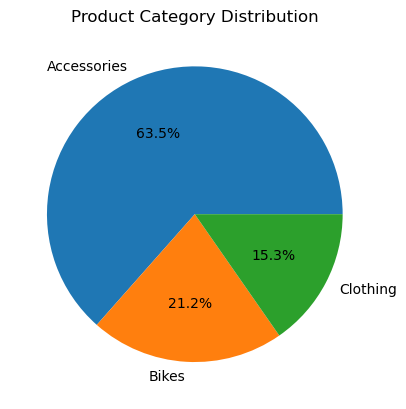

In [51]:
import matplotlib.pyplot as plt

category_counts = df['Product_Category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.show()


##### * **key takeaway:**  accesories had more product category listing

### 4.2: Top 5 Products Purchased by Female Customers

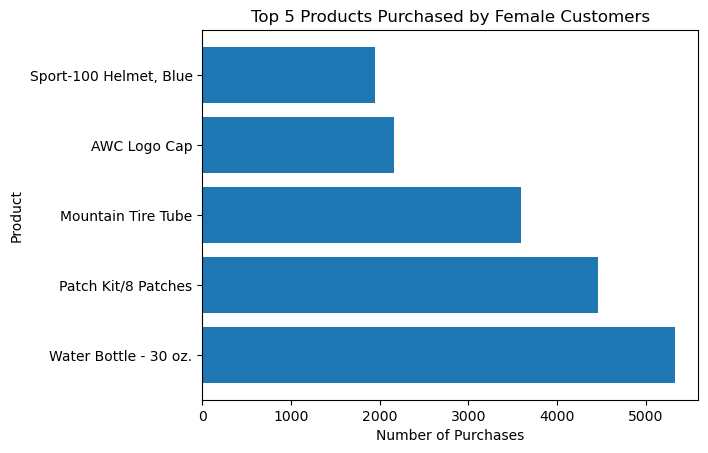

In [52]:

filt = (df['Customer_Gender'] == 'Female')
product_counts = df[filt].Product.value_counts().sort_values(ascending=False).head(5)

plt.barh(product_counts.index, product_counts.values)
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.title('Top 5 Products Purchased by Female Customers')
plt.show()


##### * **key takeaway:**  more female customers were intrested in water Bottle-30oz. hence had more purchases

### 4.3: Total Order Quantity and Profit by Product in Canada in 2015

C:\Users\Tamie\AppData\Local\Temp\ipykernel_15424\2702349142.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_data = df[filt].groupby('Product')['Order_Quantity', 'Profit'].sum().sort_values(by='Order_Quantity', ascending=False).head(3)


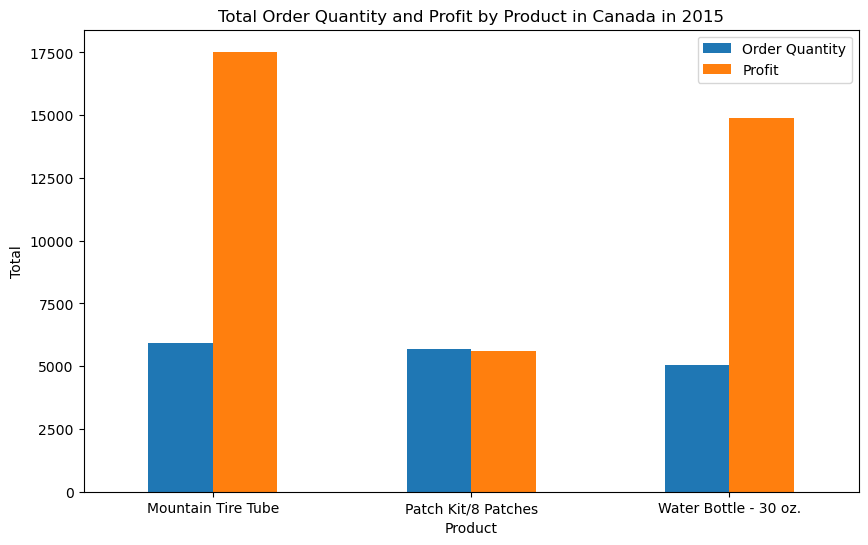

In [56]:


filt = (df['Country'] == 'Canada') & (df['Year'] == 2015)
product_data = df[filt].groupby('Product')['Order_Quantity', 'Profit'].sum().sort_values(by='Order_Quantity', ascending=False).head(3)

# Plot the data as a grouped bar chart
product_data.plot(kind='bar', y=['Order_Quantity', 'Profit'], figsize=(10,6), rot=0)
plt.xlabel('Product')
plt.ylabel('Total')
plt.title('Total Order Quantity and Profit by Product in Canada in 2015')
plt.legend(['Order Quantity', 'Profit'])
plt.show()


##### * **key takeaway:**  mountain tire tube had more order quantity and profit

### 4.4:Total Revenue Generated by Top 3 Best-Selling Products

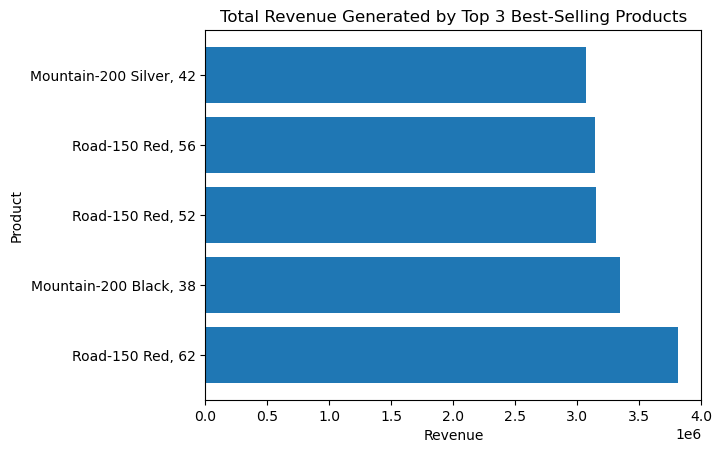

In [58]:


revenue_data = df.groupby('Product').Revenue.sum().sort_values(ascending=False).head()

# Plot the data as a horizontal bar chart
plt.barh(revenue_data.index, revenue_data.values)
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.title('Total Revenue Generated by Top 3 Best-Selling Products')
plt.show()


##### * **key takeaway:** road -150 product has created more revenue

### 4.5: Total Revenue Generated in Each Year

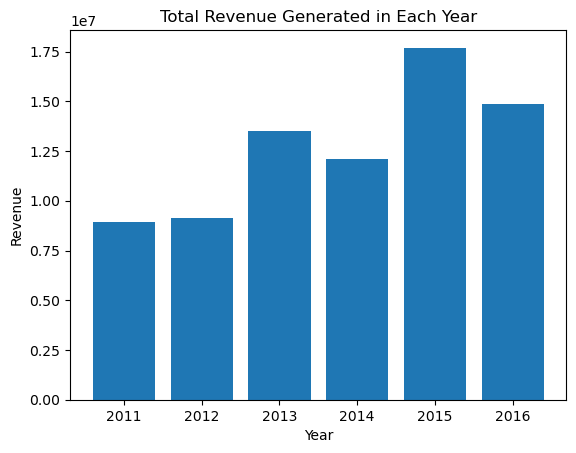

In [65]:


data = df.groupby('Year').Revenue.sum().sort_values(ascending=False)

# Plot the data as a bar chart
plt.bar(data.index, data.values)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated in Each Year')

plt.show()


##### * **key takeaway:**  2015 had more years generated

### 4.6: Total Order Quantity of Bike Racks Sold in Each State of Australia

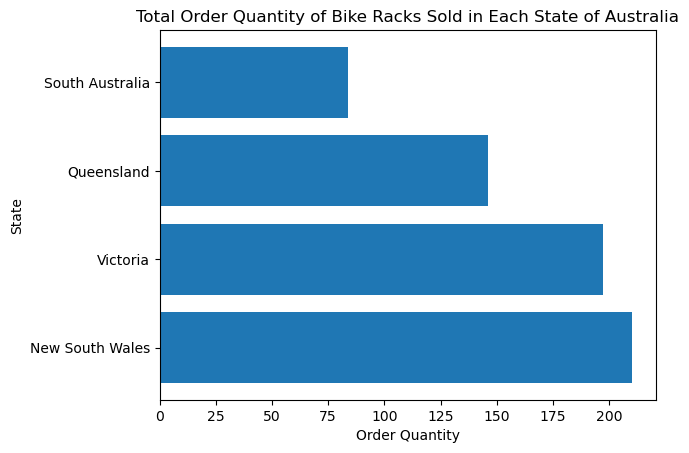

In [60]:


filt = (df['Country'] == 'Australia') & (df['Sub_Category'] == 'Bike Racks')
order_data = df[filt].groupby('State').Order_Quantity.sum().sort_values(ascending=False)

# Plot the data as a horizontal bar chart
plt.barh(order_data.index, order_data.values)
plt.xlabel('Order Quantity')
plt.ylabel('State')
plt.title('Total Order Quantity of Bike Racks Sold in Each State of Australia')
plt.show()


##### * **key takeaway:**  more bikes were sold in new south wales, more than 200 quantites

### 4.7: Total Revenue and Profit Generated by Each Country in 2015

C:\Users\Tamie\AppData\Local\Temp\ipykernel_16276\4033494173.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df[filt].groupby('Country')['Revenue', 'Profit'].sum().sort_values(by='Revenue', ascending=False)


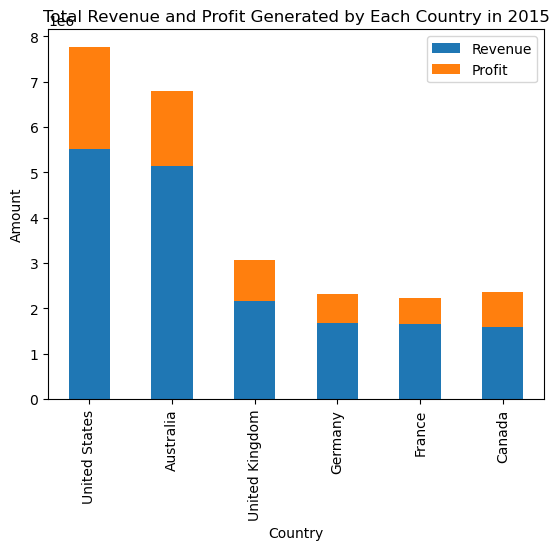

In [7]:


filt = df['Year'] == 2015
data = df[filt].groupby('Country')['Revenue', 'Profit'].sum().sort_values(by='Revenue', ascending=False)

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit Generated by Each Country in 2015')
plt.legend()
plt.show()


##### * **key takeaway:**  more revenue and profit was generated united states

### 4.8: Total Profit Generated in Each Month

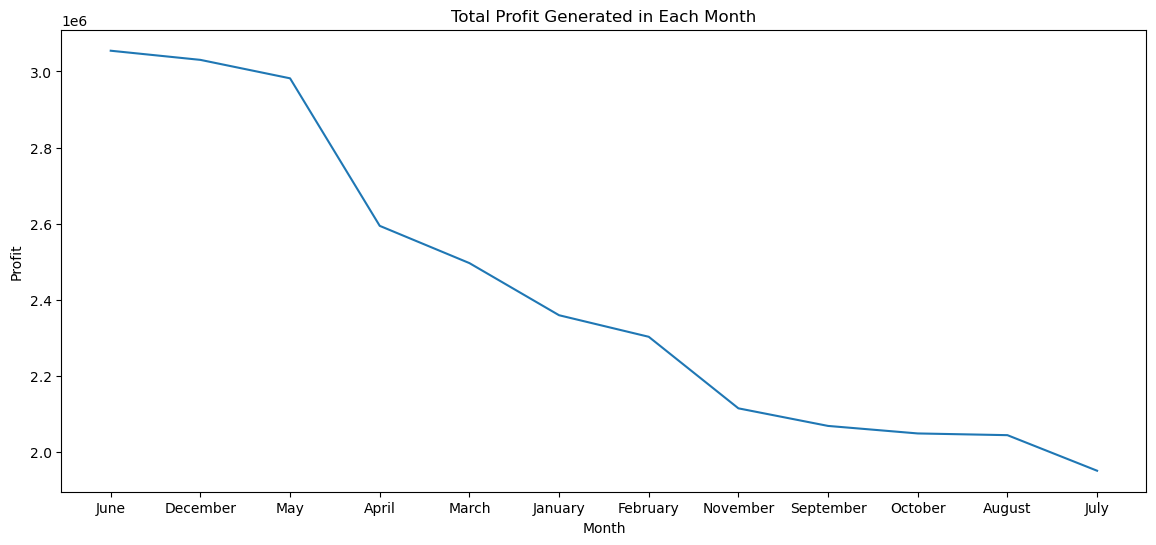

In [64]:


data = df.groupby('Month').Profit.sum().sort_values(ascending=False)

# Create a larger figure with 10-inch width and 6-inch height
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the data as a line chart
ax.plot(data.index, data.values)
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Total Profit Generated in Each Month')

plt.show()


##### * **key takeaway:**  more profit was generated in june, the least being july

In [6]:

#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\cleaned sales")

#### Further data Visualization was done in powerbi:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZDExZjU5ZDYtYzAwYS00NDIxLWI4YWMtNmY0ZjM3NTE0NWNjIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

## Author: TamiriraIshe Nyevera

## Date: 6 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZDExZjU5ZDYtYzAwYS00NDIxLWI4YWMtNmY0ZjM3NTE0NWNjIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)